# Baseline Prediction Model

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Modules:" data-toc-modified-id="Import-Modules:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Modules:</a></span></li><li><span><a href="#Import-Data:" data-toc-modified-id="Import-Data:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data:</a></span></li><li><span><a href="#Set-up-Model:" data-toc-modified-id="Set-up-Model:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Set up Model:</a></span></li><li><span><a href="#Fit-Model:" data-toc-modified-id="Fit-Model:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Fit Model:</a></span></li><li><span><a href="#Save-the-Model:" data-toc-modified-id="Save-the-Model:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Save the Model:</a></span></li><li><span><a href="#Analyse-Model-Results:" data-toc-modified-id="Analyse-Model-Results:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analyse Model Results:</a></span></li><li><span><a href="#Analyse-Classification-Scores:" data-toc-modified-id="Analyse-Classification-Scores:-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Analyse Classification Scores:</a></span></li></ul></div>

### Import Modules:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, make_scorer
from sklearn.dummy import DummyClassifier

import scikitplot as skplt

### Import Data:

In [3]:
# Filepaths / names:
y1_train_file = '../Data/y1_train_clean_processed.csv'
y1_test_file = '../Data/y1_test_clean_processed.csv'
X1_train_file = '../Data/X1_train_clean_processed.csv'
X1_test_file = '../Data/X1_test_clean_processed.csv'

In [4]:
y1_train = pd.read_csv(y1_train_file)

In [5]:
y1_test = pd.read_csv(y1_test_file)

In [6]:
X1_train = pd.read_csv(X1_train_file)

In [7]:
X1_test = pd.read_csv(X1_test_file)

### Set up Model:

In [8]:
model0 = DummyClassifier(strategy="most_frequent")

### Fit Model:

In [9]:
model0.fit(X1_train,y1_train)

DummyClassifier(strategy='most_frequent')

### Save the Model:

In [10]:
joblib.dump(model0, '../Model_Save_Files/Baseline_Prediction_Model_0.jlib')

['../Model_Save_Files/Baseline_Prediction_Model_0.jlib']

### Analyse Model Results:

In [13]:
print(model0.score(X1_train, y1_train))

0.2480302857142857


### Analyse Classification Scores:

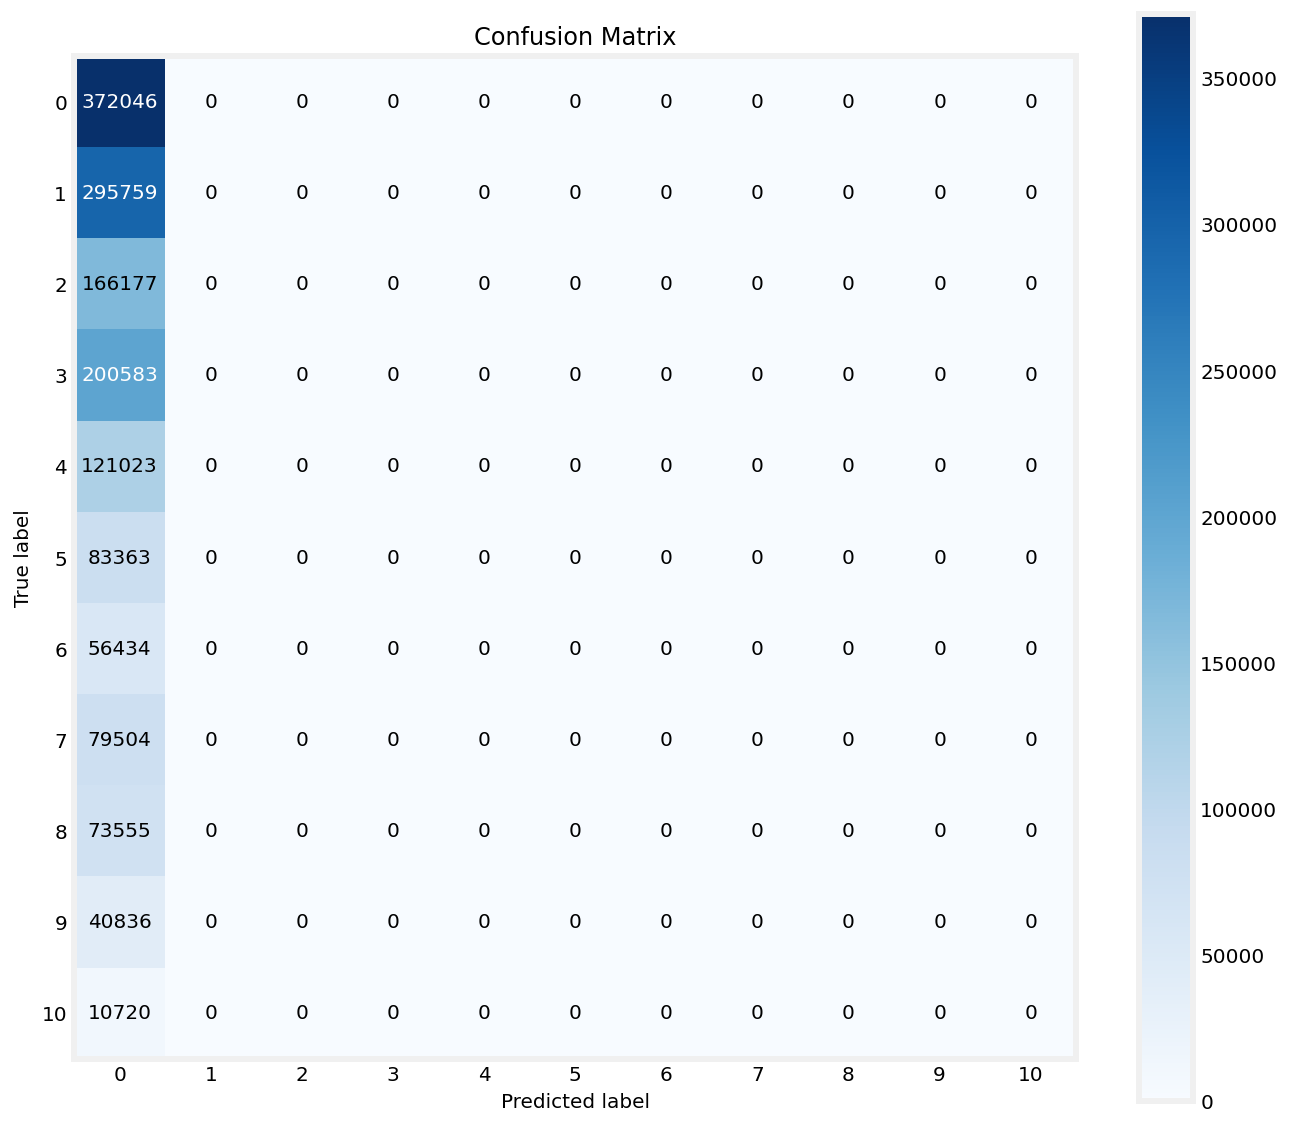

In [14]:
# Confusion Matrix
predictions_test0 = model0.predict(X1_test)

skplt.metrics.plot_confusion_matrix(y1_test,predictions_test0,labels=[0,1,2,3,4,5,6,7,8,9,10],figsize=(10,10))
plt.show()

In [15]:
# Cross Validation Score
cvs0 = cross_val_score(model0, X1_test, y1_test, cv=5)
print(cvs0.mean())

0.24803066666666665


In [16]:
# Accuracy, Precision and Recall
predictions_train0 = model0.predict(X1_train)

print(classification_report(y1_train, predictions_train0))
print(classification_report(y1_test, predictions_test0))

C:\Users\jackh\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.25      1.00      0.40    868106
           1       0.00      0.00      0.00    690106
           2       0.00      0.00      0.00    387747
           3       0.00      0.00      0.00    468026
           4       0.00      0.00      0.00    282387
           5       0.00      0.00      0.00    194514
           6       0.00      0.00      0.00    131678
           7       0.00      0.00      0.00    185511
           8       0.00      0.00      0.00    171628
           9       0.00      0.00      0.00     95284
          10       0.00      0.00      0.00     25013

    accuracy                           0.25   3500000
   macro avg       0.02      0.09      0.04   3500000
weighted avg       0.06      0.25      0.10   3500000

              precision    recall  f1-score   support

           0       0.25      1.00      0.40    372046
           1       0.00      0.00      0.00    295759
           2       0.00 

In [17]:
# Precision Recall and ROC Curves
probabilities0_train = model0.predict_proba(X1_train)
probabilities0_test = model0.predict_proba(X1_test)

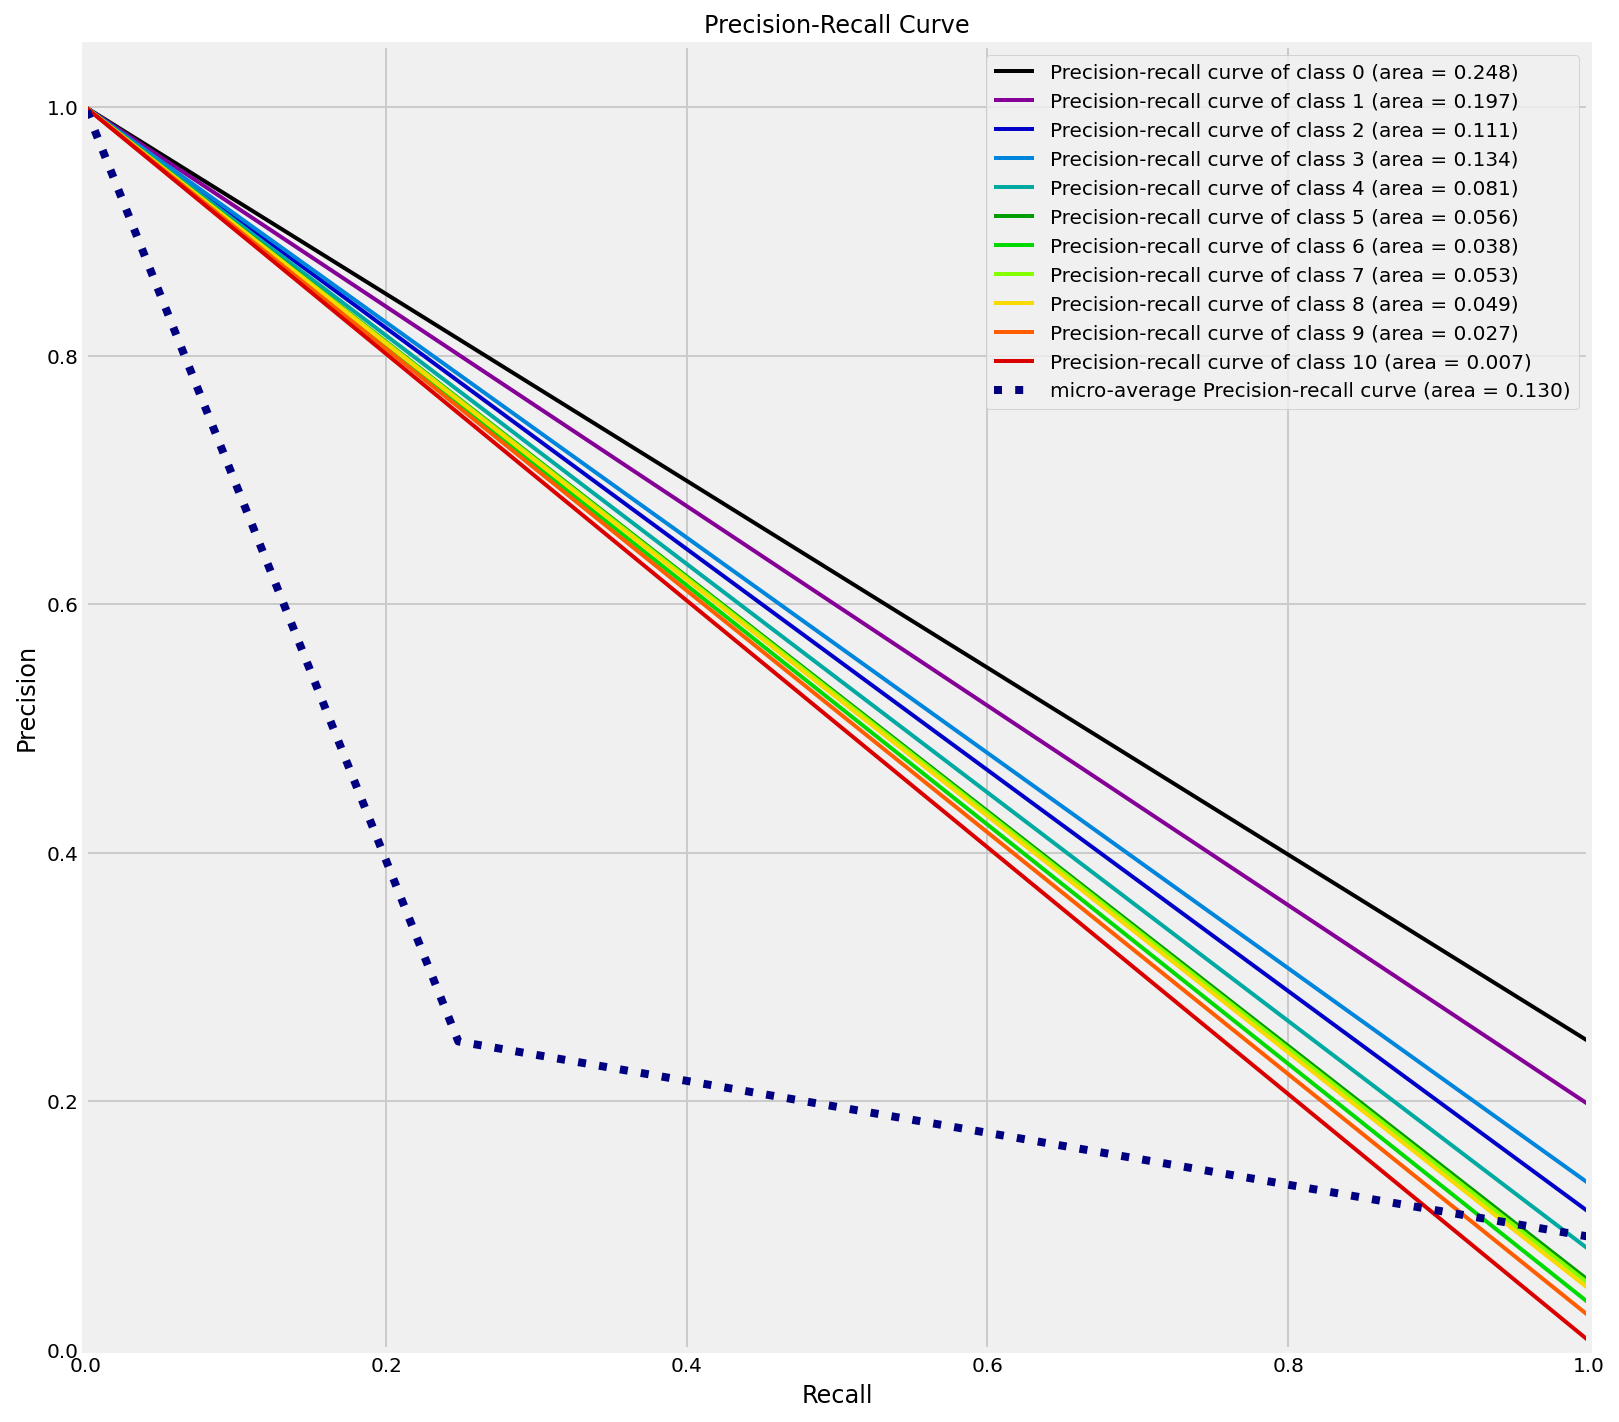

In [18]:
skplt.metrics.plot_precision_recall(y1_train, probabilities0_train,figsize=(12,12))
plt.show()

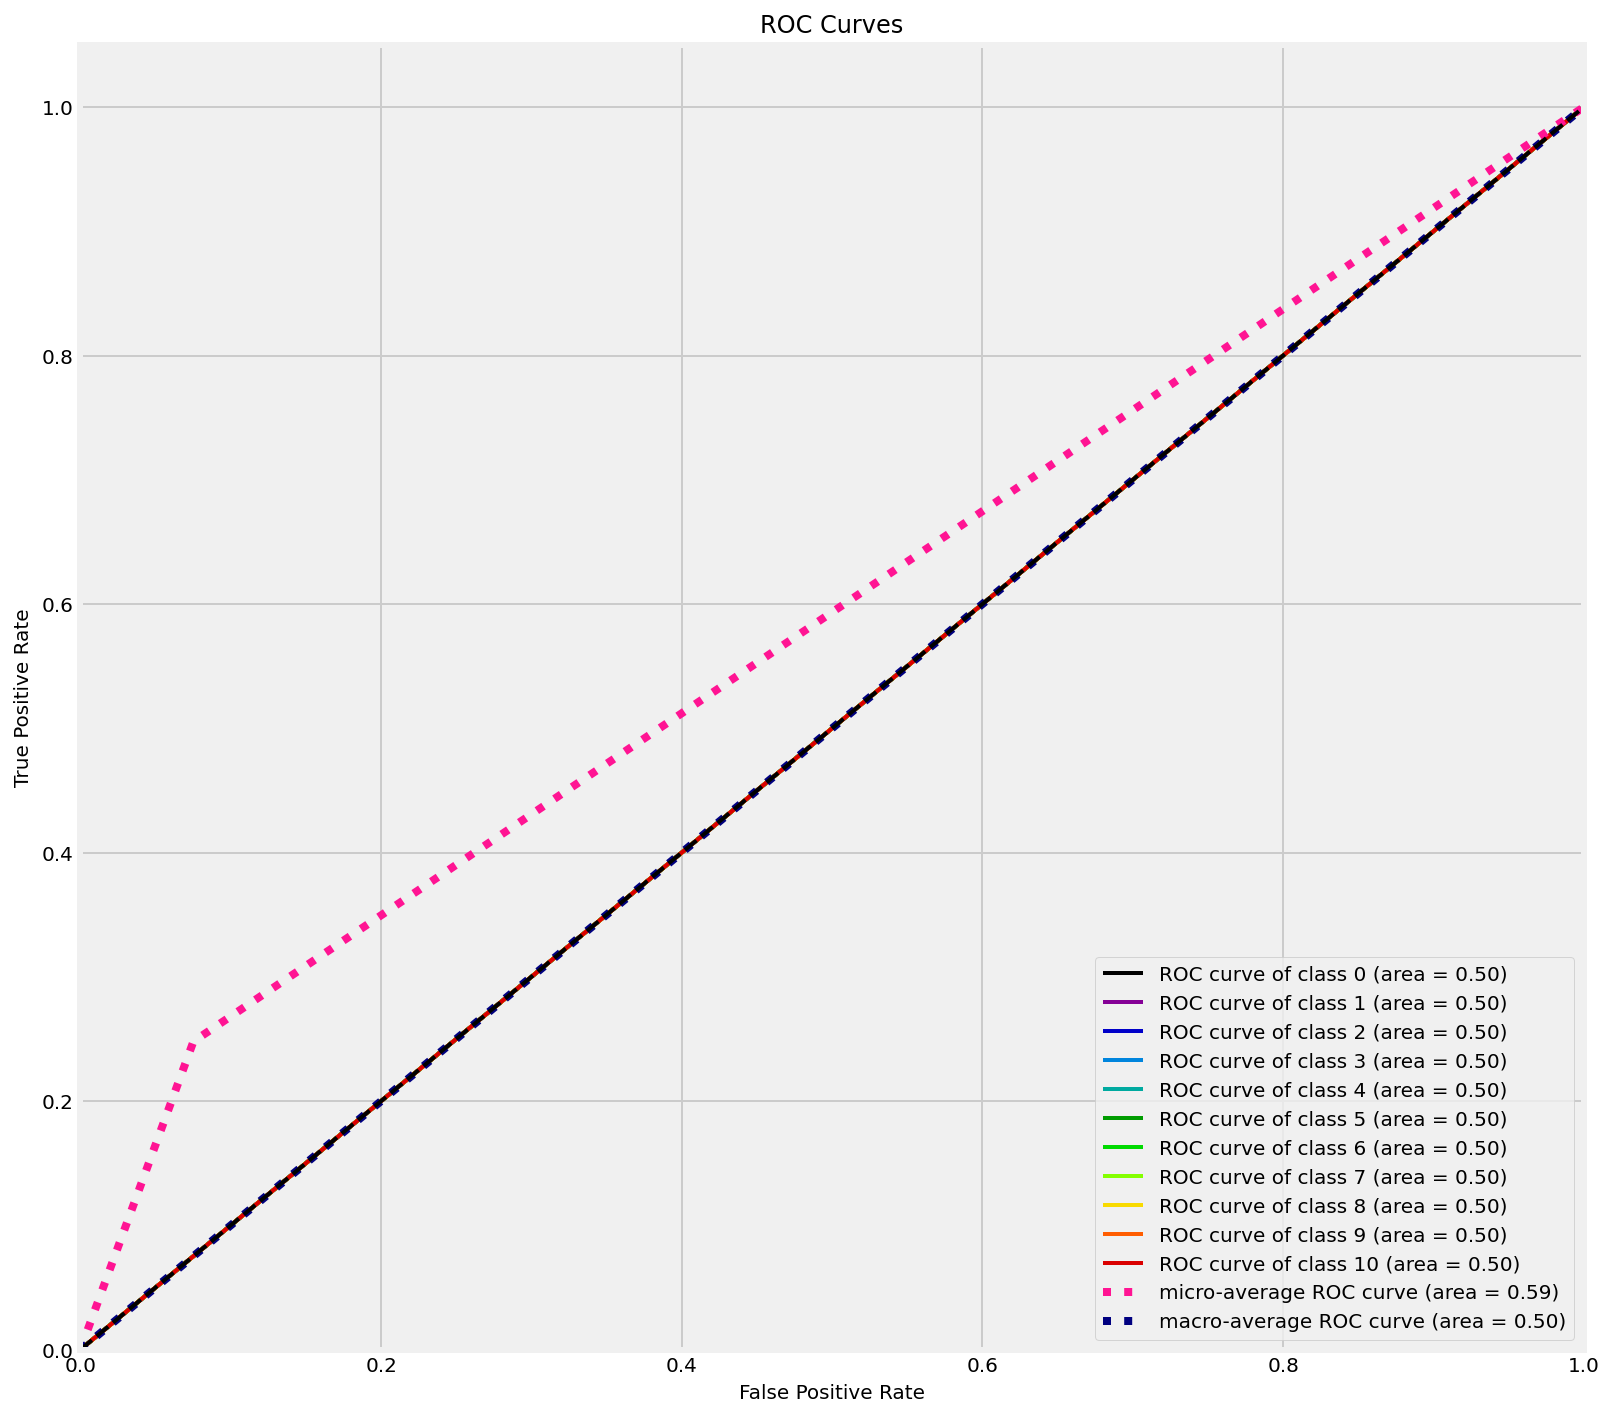

In [19]:
skplt.metrics.plot_roc(y1_train, probabilities0_train,figsize=(12,12))
plt.show()

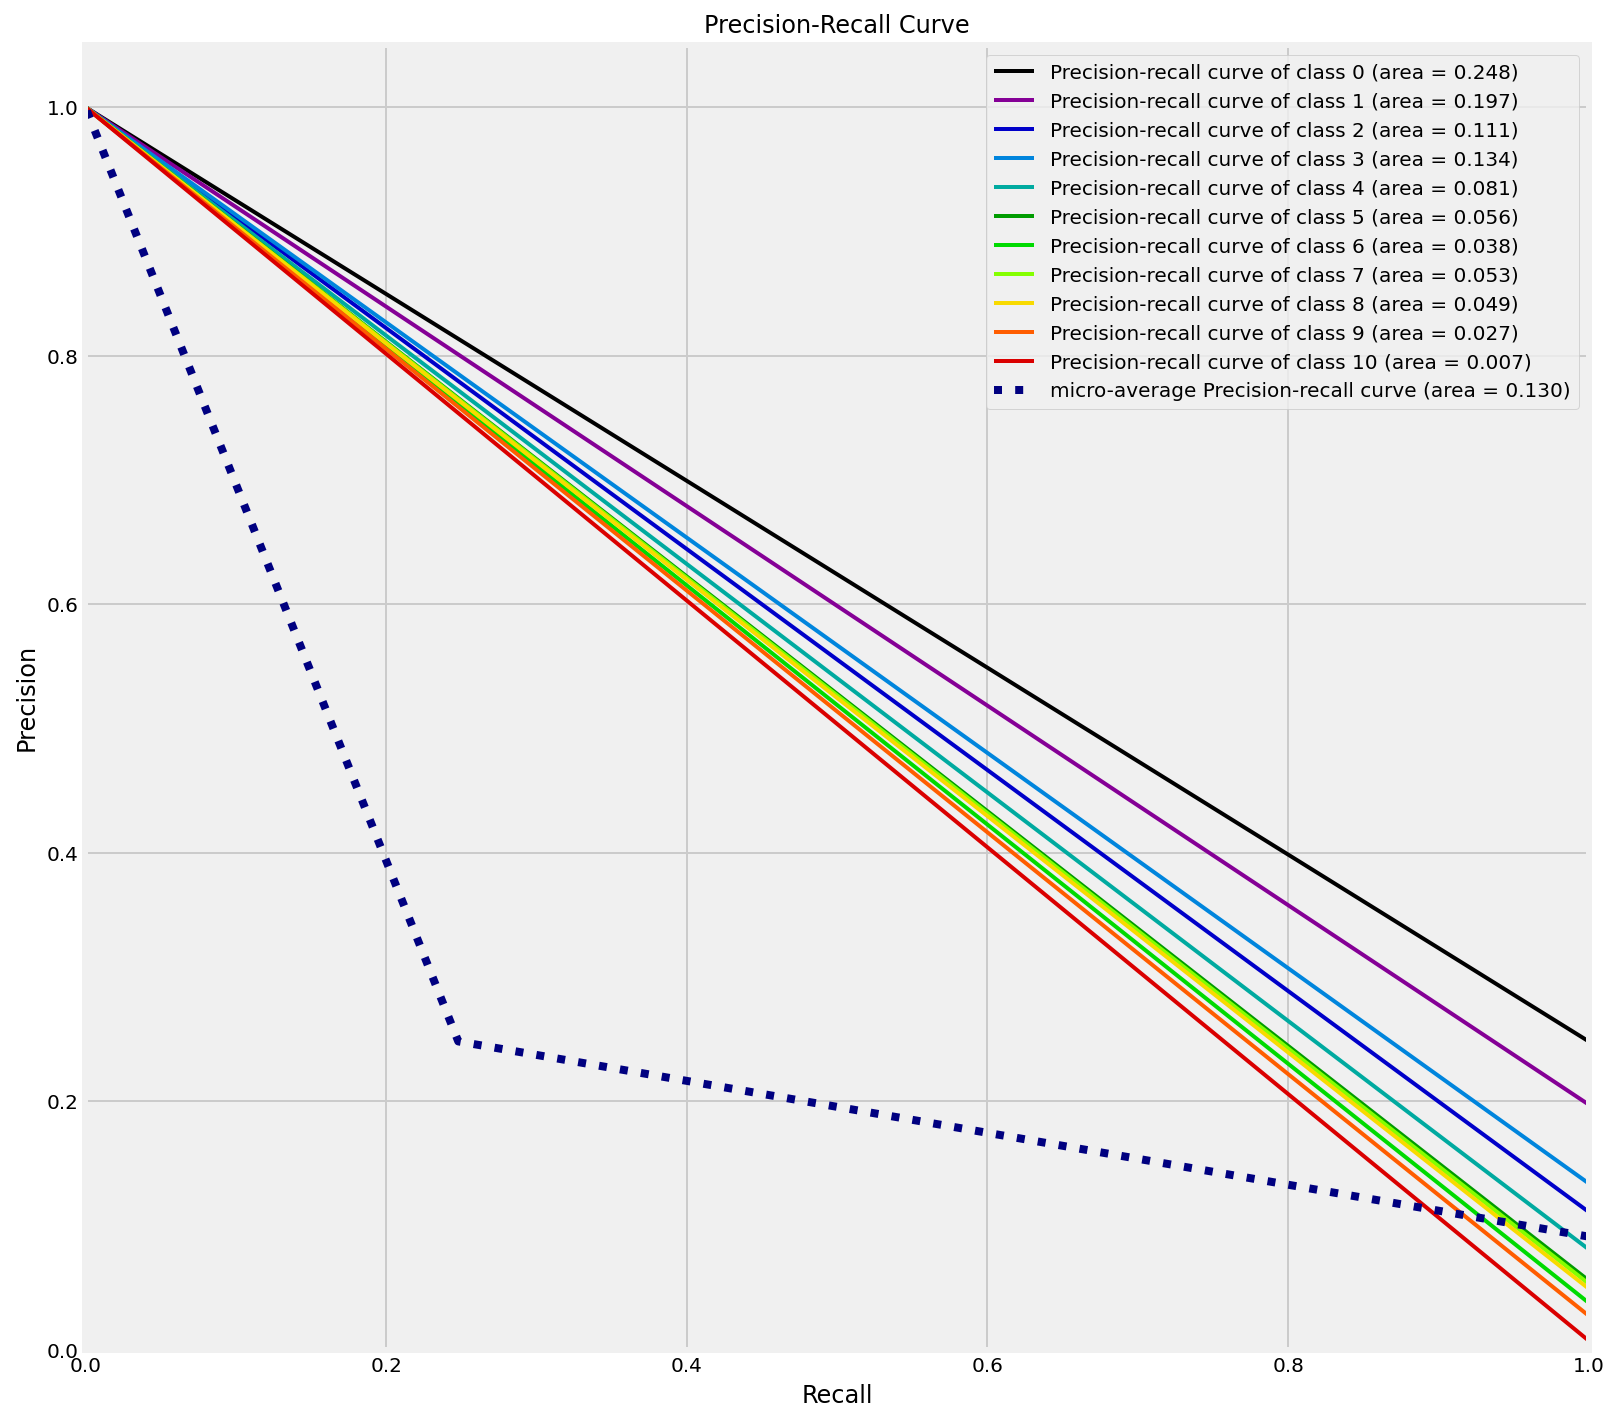

In [20]:
skplt.metrics.plot_precision_recall(y1_test, probabilities0_test,figsize=(12,12))
plt.show()

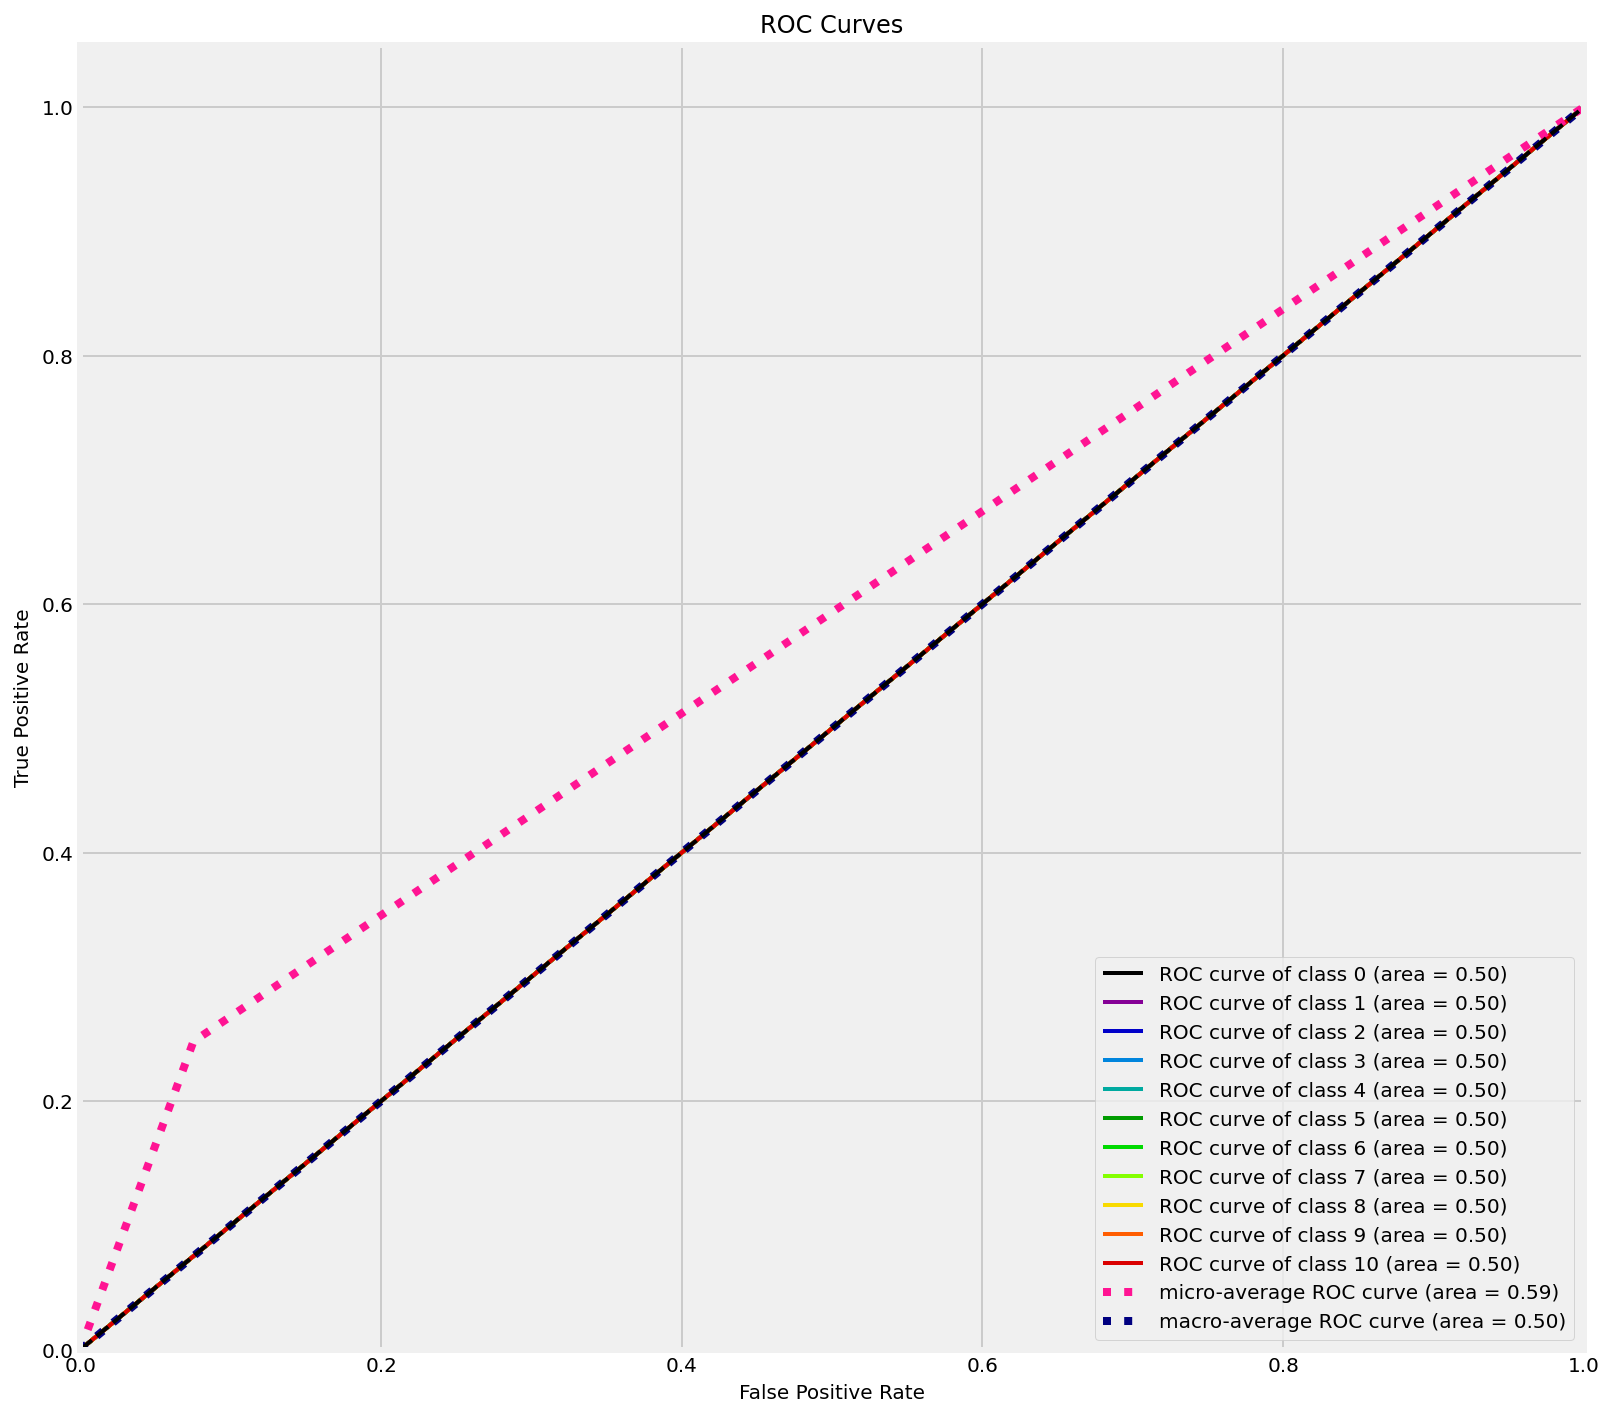

In [21]:
skplt.metrics.plot_roc(y1_test, probabilities0_test,figsize=(12,12))
plt.show()